### Satya Medicherla - satyams@hotmail.com
### www.linkedin.com/in/satya-medicherla-NY

## Bigtincan Data Science Challenge

### Contents

- Problem Overview
- Model Selection Strategy
- Reading the Data Set
- Descriptive Statistics
- Categorical Features
- Handle/Impute Unknown values
- The data types of cleansed data set
- Data set splitting into training, cross-validation and test sets
- Need for balanced data sets and SMOTE for Balancing the Data Set
- Feature Scaling 
- Building the Models
    - Logistic Regression Classifier
    - K- Nearest Neighbors Classifier
    - Naive Bayes' Classifier
    - Decision Tree Classifier
    - Random Forest Classifier
    - Neural Net based Classifier
- Final Model Selection using Model Metrics
- Final Model Accuracy of Selected model on test set
- Conclusion

### Overview

The objective of this exercise is to build a model that predicts whether a bank customer will churn (leave their bank services), given the relevant input information about the customer and the bank’s historical data about their other customers. This would help the bank management develop a strategy for customer retainment.

### Model Selection Strategy

This data set is a typical case of binary classification.   We will split the data set into training (60%), testing (20%) and cross-validation set.   We will build different classification models like Logistic Regression, K-Nearest Neighbors classifier, Decision Tree classifier, Random Forest classifier and Neural Net based classfier.  We run each model through the cross validation set and pickup the one that performs the best on the cross-validation set.   Then we will use the test set to determine the final model accuracy that would be disclosed as the model's accuracy.   We will discuss further details on data-cleansing that includes imputing the missing values,   replacing  the categorical variables by their dummy variables etc.   Also we will discuss about the SMOTE technique to remove the imbalance in the data set.

In [423]:
## Let us import all the necessary packages
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [424]:
## Read the data set into a Pandas DataFrame and list few data samples
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [425]:
# drop the client identification number - this does not influence the model
df.drop(['CLIENTNUM'],axis=1,inplace=True)

### Descriptive Statistics 

Let us describe the data set to find out the min, max and ranges of al numeric features and display the correlations between the features.

In [426]:
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [381]:
# let us see the correlation between pairs of features
df.corr()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,C__Blue,C__Gold,C__Platinum,C__Silver,G__F,G__M
Attrition_Flag,1.000000,0.018203,0.018991,0.013687,-0.150005,0.152449,0.204491,-0.023873,-0.263053,-0.000285,...,-0.168598,-0.371403,-0.290054,-0.178410,0.003216,0.005973,0.010823,-0.008467,0.037272,-0.037272
Customer_Age,0.018203,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,...,-0.046446,-0.067097,-0.012143,0.007114,0.021409,-0.011901,0.006515,-0.019425,0.017312,-0.017312
Dependent_count,0.018991,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,...,0.025046,0.049912,0.011087,-0.037135,-0.027671,0.027035,0.003555,0.017322,-0.004563,0.004563
Months_on_book,0.013687,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,...,-0.038591,-0.049819,-0.014072,-0.007541,0.014934,-0.005426,0.001791,-0.014357,0.006728,-0.006728
Total_Relationship_Count,-0.150005,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,...,-0.347229,-0.241891,0.040831,0.067663,0.085789,-0.055678,-0.043289,-0.060566,-0.003157,0.003157
Months_Inactive_12_mon,0.152449,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,...,-0.036982,-0.042787,-0.038989,-0.007503,0.016565,-0.003283,-0.004013,-0.016034,0.011163,-0.011163
Contacts_Count_12_mon,0.204491,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,...,-0.112774,-0.152213,-0.094997,-0.055471,0.000929,-0.000685,0.001797,-0.001059,-0.039987,0.039987
Credit_Limit,-0.023873,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,...,0.171730,0.075927,-0.002020,-0.482965,-0.515644,0.234331,0.105976,0.441030,-0.420806,0.420806
Total_Revolving_Bal,-0.263053,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,...,0.064370,0.056060,0.089861,0.624022,-0.022681,0.023974,0.005739,0.012799,-0.029658,0.029658
Avg_Open_To_Buy,-0.000285,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,...,0.165923,0.070885,-0.010076,-0.538808,-0.513502,0.232132,0.105439,0.439790,-0.418059,0.418059


<AxesSubplot:xlabel='Marital_Status,Attrition_Flag'>

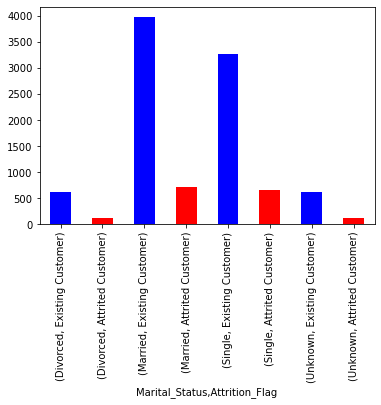

In [427]:
# We can plot a bar char to see how the the target depends upon relevant feature
df.groupby(['Marital_Status'])['Attrition_Flag'].value_counts().plot.bar(color=['blue', 'red'])

<AxesSubplot:xlabel='Education_Level,Attrition_Flag'>

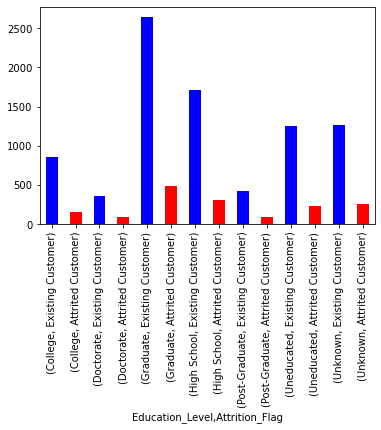

In [428]:
# We can plot a bar char to see how the the target depends upon relevant feature
df.groupby(['Education_Level'])['Attrition_Flag'].value_counts().plot.bar(color=['blue', 'red'])

<AxesSubplot:xlabel='Income_Category,Attrition_Flag'>

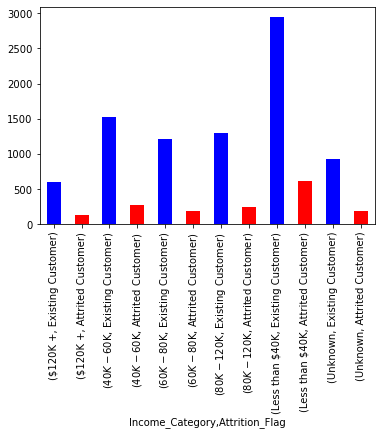

In [400]:
# We can plot a bar char to see how the the target depends upon relevant feature
df.groupby(['Income_Category'])['Attrition_Flag'].value_counts().plot.bar(color=['blue', 'red'])

<AxesSubplot:xlabel='Card_Category,Attrition_Flag'>

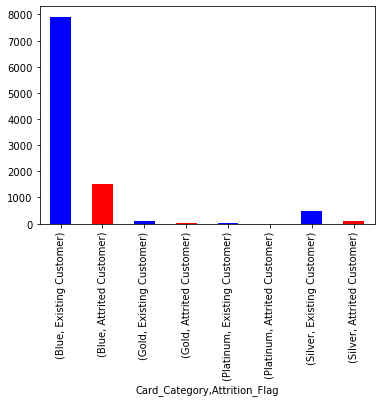

In [429]:
# We can plot a bar char to see how the the target depends upon relevant feature
df.groupby(['Card_Category'])['Attrition_Flag'].value_counts().plot.bar(color=['blue', 'red'])

In [430]:
# check the outcome flag values and convert them to 0-Existing Customer and 1-Attrited Customer
df['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [431]:
# Map the categorical data in target Attrition_Flag to 0 and 1
attr_dict={'Existing Customer':0,'Attrited Customer':1}
df['Attrition_Flag'].replace(attr_dict,inplace=True)

### Categorical Features

Let us check the data types of all the features.   If there are any features,   we will replace these variables with the corresponding dummy variables.

In [432]:
# Check the data types and and encode the categorical variables
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

#### Handle Unknown values

Thee are some unknown values in the data set - Education_Level, Marital_Status and Income_Category.  Let us replace these unknown values to np.nan so that we can easily do fillna to replace the modes of the corresponding features.  

In [433]:
df.Education_Level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64

In [434]:
# replace all 'Unknown' values with nan
df.replace('Unknown',np.nan,inplace=True)
df.isnull().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

In [435]:
# impute all the missing/unknown values with the corresponding mode
df['Education_Level'].fillna(df['Education_Level'].mode(),inplace=True)
df['Marital_Status'].fillna(df['Marital_Status'].mode(),inplace=True)
df['Income_Category'].fillna(df['Income_Category'].mode(),inplace=True)

df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,1,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,1,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,1,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [436]:
# add dummy columns as needed ad drop those categorical columns

df=pd.concat([df,pd.get_dummies(df['Card_Category'],prefix='C_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Gender'],prefix='G_')],axis=1)
pd.concat([df,pd.get_dummies(df['Education_Level'],prefix='E_')],axis=1)
pd.concat([df,pd.get_dummies(df['Marital_Status'],prefix='M_')],axis=1)
pd.concat([df,pd.get_dummies(df['Income_Category'],prefix='I_')],axis=1)

# drop the categorical columns
df.drop(['Card_Category','Gender','Education_Level','Marital_Status','Income_Category'],axis=1,inplace=True)

### The data types of cleansed data set

    Let us check the data types of the cleansed data set to make sure that there are no categorical variables.  


In [437]:
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
C__Blue                       uint8
C__Gold                       uint8
C__Platinum                   uint8
C__Silver                     uint8
G__F                          uint8
G__M                          uint8
dtype: object

### Data set splitting

Now let us split our cleansed data set into train, cross-validation and test data sets.   We are using the stratify parameter to make sure the target distribution is uniform in these train, cross-validationa and test data sets.

In [438]:
# do a train test split- let us use the stratify parameter for uniform distribution of labels in train and test splits

df_train,df_test_cv = train_test_split(df,test_size=0.4,random_state=2,stratify=df['Attrition_Flag'])
df_test,df_cv = train_test_split(df_test_cv,test_size=0.5,random_state=2,stratify=df_test_cv['Attrition_Flag'])

In [439]:
print(df_train.shape)
print(df_test.shape)
print(df_cv.shape)

(6076, 21)
(2025, 21)
(2026, 21)


#### SMOTE for Balancing the Data Set

In case of imbalanced data sets, the Precision and Recall statistics are mis-leading.   We need to look at the f1-score which is the hormonic-mean of the precision and recall, to decide the model accuracy. 

This is a typical case of imbalanced data set where the counts of  +ve (Attrited Customer) and -ve (Existing Customer) are entirely different - in fact the +ve numbers are very few.  There are different techniques like undersampling, oversampling.   We will use the SMOTE (Synthetic Minority Oversampling Technique).   This technique basically generate more samples of the minority class.  

In [440]:
# Use SMOTE to sample more samples of minority class

sm = SMOTE(random_state=111)

print(df.shape)
y_train = df_train['Attrition_Flag']
print("original counts ",y_train.value_counts())

df_train_resampled, y_train_resampled = sm.fit_resample(df_train, y_train)
#y_train = y_train_resampled.copy()
print(df_train_resampled.shape)

print("After resampling counts ",y_train_resampled.value_counts())

(10127, 21)
original counts  0    5100
1     976
Name: Attrition_Flag, dtype: int64
(10200, 21)
After resampling counts  1    5100
0    5100
Name: Attrition_Flag, dtype: int64


### Feature Scaling

Scale all the features to bring all of them into the same ranges of values. This is necessary specifically for KNN-Classifier where the Euclidean distance is computed If we do not scale the features,  the features with bigger ranges influence the outcome the most.


In [441]:
# Scale all the features to bring all of them into the same ranges of values 
# This is necessary specifically for KNN-Classifier where the Euclidean distance is computed
# If we do not scale the features,  the features with bigger ranges influence the outcome the most

columns = ['Customer_Age','Dependent_count','Months_on_book','Total_Relationship_Count','Months_Inactive_12_mon',
           'Contacts_Count_12_mon','Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
           'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
# define min max scaler
scaler = StandardScaler()

y_train = df_train['Attrition_Flag']
df_train_resampled.drop(['Attrition_Flag'], axis=1,inplace=True)
df_train_scaled = scaler.fit_transform(df_train_resampled[columns])

y_test = df_test['Attrition_Flag']
df_test.drop(['Attrition_Flag'], axis=1,inplace=True)
df_test_scaled = scaler.fit_transform(df_test[columns])

y_cv = df_cv['Attrition_Flag']
df_cv.drop(['Attrition_Flag'], axis=1,inplace=True)
df_cv_scaled = scaler.fit_transform(df_cv[columns])



In [442]:
# check the data set sizes

print(df_train_resampled.shape)
print(y_train_resampled.shape)

print(df_test.shape)
print(y_test.shape)

print(df_cv.shape)
print(y_cv.shape)

(10200, 20)
(10200,)
(2025, 20)
(2025,)
(2026, 20)
(2026,)


In [443]:
# Function to display the model Metrics
# Prints the matrics
# Parameters
#    classifier - the actual model
#    df_test  - test data
#    y_test   - test data labels
#    classifier_type is Logistic Regression, Decision Tree, NeuralNet etc.

def print_metrics(classifier,df_test,y_test,classifier_type):
    print("{}".format(classifier_type))
    print("-----------------------")
    
    if classifier_type == 'NeuralNet-Classifier':
        y_predict = NN_classifier.predict(df_test) > 0.5
    else:
        y_predict = classifier.predict(df_test)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test, y_predict))
    

### Logistic Regression Classifier

Let us first consider the Logistic Regression model since the current problem is a typical case of Binary Classification. PLease refer to my review paper/article https://ijournals.in/wp-content/uploads/2020/03/1.7401-Satya.pdf



In [444]:
# This function builds the Logistic Regression Classifier  and returns it
# Prints the matrics
# Parameters
#    df_train - training data 
#    y_train  - target labels
#    df_test  - test data
#    y_test   - test data labels


def build_logistic_regression(df_train,y_train,df_test,y_test):
    LRclassifier = logreg = LogisticRegression()
    LRclassifier.fit(df_train, y_train) 

    # Predict y data with logistic regression/classifier: 
    y_predict = LRclassifier.predict(df_test)

    return LRclassifier

### K-Nearest Neighbors Classifier

Let us now consider K-Nearest Neighbors to classiify the customers.   Please refer to my peper/article on KNN-algorithm https://ijournals.in/wp-content/uploads/2020/03/2.7604-Satya.pdf



In [445]:
# This function builds the K-Nearest Neighbors Classifier  and returns it
# Prints the matrics
# Parameters
#    df_train - training data 
#    y_train  - target labels
#    df_test  - test data
#    y_test   - test data labels

def build_KNN(df_train,y_train,df_test,y_test):
    # Use the KNN classifier to fit data:
    KNNclassifier = KNeighborsClassifier(n_neighbors=5)
    KNNclassifier.fit(df_train, y_train) 

    # Predict y data with classifier: 
    y_predict = KNNclassifier.predict(df_test)

    return KNNclassifier

### Naive Bayes' Classifier

Let us now consider the Naive Bayes' Classifier for classifying our constomers.   Please refer to my paper/article https://ijournals.in/wp-content/uploads/2020/03/5.71003-satyanarayana.pdf for more details on how to build a Naive Bayes' Classifier

In [446]:
# This function builds the Naive Bayes' Classifier  and returns it
# Prints the matrics
# Parameters
#    df_train - training data 
#    y_train  - target labels
#    df_test  - test data
#    y_test   - test data labels

def build_Naive_Bayes(df_train,y_train,df_test,y_test):
    # Initialize classifier:
    NB_classifier = GaussianNB()

    # Train the classifier:
    model = NB_classifier.fit(df_train, y_train)

    return NB_classifier

### Decision Tree Classifier
Let us now consider the Decision Tree Classifier model for classifying our constomers.   Please refer to my paper/article https://ijournals.in/wp-content/uploads/2020/02/IJSHRE-8117-Satyanarayana-Medicherla-Revised.pdf
for more details on Decision Tree Classifier

In [447]:
# This function builds the Decision Tree Classifier Model and returns the model
# Prints the matrics
# Parameters
#    df_train - training data 
#    y_train  - target labels
#    df_test  - test data
#    y_test   - test data labels

## Decision Tree Classifier
def build_decision_tree(df_train,y_train,df_test,y_test):
    # Make a decision tree and train
    treeClassifier = DecisionTreeClassifier(random_state=111)
    treeClassifier.fit(df_train, y_train)
    
    return treeClassifier

### Random Forest Classifier

Now let us consider the Randorm Forest Classifier - please refer to my paper/article https://github.com/mstayams/Pepers/blob/main/RandomForests_final.docx for further details on Random Forest Classifier

In [448]:
# This function builds the Random Forest Model and returns the model
# Prints the matrics
# Parameters
#    df_train - training data 
#    y_train  - target labels
#    df_test  - test data
#    y_test   - test data labels

def build_random_forest(df_train,y_train,df_test,y_test):

    # Create the model with 100 trees
    rforestClassifier = RandomForestClassifier(n_estimators=100, 
                                   bootstrap = True,
                                   max_features = 'sqrt')
    # Fit on training data
    rforestClassifier.fit(df_train, y_train)
    
    return rforestClassifier

### Neural Net Based Classifier

Now let us build a Neural Net  based classifier model 

In [464]:
# This function builds the Neural Network and returns the model
# Prints the matrics
# Parameters
#    df_train - training data 
#    y_train  - target labels
#    df_test  - test data
#    y_test   - test data labels
#    n_epochs - numbers epochs for training

def build_NeuralNet(df_train,y_train,df_test,y_test,n_epochs):
    
    NN_classifier = keras.Sequential([
        keras.layers.Dense(15,input_shape=(14,),activation="relu"),
        keras.layers.Dense(15,activation="relu"),
        keras.layers.Dense(15,activation="relu"),
        keras.layers.Dense(1,activation="sigmoid")
                            ])
    
    NN_classifier.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy']
                 )
    
    NN_classifier.fit(df_train,y_train,epochs=n_epochs)

    return NN_classifier

### Model Selection

Let us run each model through our cross-validation data set to pick the final model that performs the best on the cross-validation data set

In [450]:
# Build the Logistgic Regression Classifier
LRclassifier = build_logistic_regression(df_train_scaled,y_train_resampled,df_cv_scaled,y_cv)
print_metrics(LRclassifier,df_test_scaled,y_test,'Logistic Regression')

Logistic Regression
-----------------------
[[1134  566]
 [  14  311]]
              precision    recall  f1-score   support

           0       0.99      0.67      0.80      1700
           1       0.35      0.96      0.52       325

    accuracy                           0.71      2025
   macro avg       0.67      0.81      0.66      2025
weighted avg       0.89      0.71      0.75      2025



In [451]:
# Build KNN classifier
KNNclassifier = build_KNN(df_train_scaled,y_train_resampled,df_cv_scaled,y_cv)
print_metrics(KNNclassifier,df_test_scaled,y_test,'KNN-Classifier')

KNN-Classifier
-----------------------
[[1281  419]
 [  30  295]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1700
           1       0.41      0.91      0.57       325

    accuracy                           0.78      2025
   macro avg       0.70      0.83      0.71      2025
weighted avg       0.89      0.78      0.81      2025



In [452]:
# Build KNN classifier
NB_classifier = build_Naive_Bayes(df_train_scaled,y_train_resampled,df_cv_scaled,y_cv)
print_metrics(NB_classifier,df_test_scaled,y_test,'Naive Bayes-Classifier')

Naive Bayes-Classifier
-----------------------
[[1002  698]
 [  39  286]]
              precision    recall  f1-score   support

           0       0.96      0.59      0.73      1700
           1       0.29      0.88      0.44       325

    accuracy                           0.64      2025
   macro avg       0.63      0.73      0.58      2025
weighted avg       0.85      0.64      0.68      2025



In [453]:
# Build the Decision Tree Classifier
treeClassifier = build_decision_tree(df_train_scaled,y_train_resampled,df_cv_scaled,y_cv)
print_metrics(treeClassifier,df_test_scaled,y_test,'Decision Tree-Classifier')

Decision Tree-Classifier
-----------------------
[[1423  277]
 [  59  266]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89      1700
           1       0.49      0.82      0.61       325

    accuracy                           0.83      2025
   macro avg       0.73      0.83      0.75      2025
weighted avg       0.88      0.83      0.85      2025



In [454]:
# Build the Random Forest Classifier
rforestClassifier = build_random_forest(df_train_scaled,y_train_resampled,df_cv_scaled,y_cv)
print_metrics(rforestClassifier,df_test_scaled,y_test,'RandomForest-Classifier')

RandomForest-Classifier
-----------------------
[[1521  179]
 [  43  282]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93      1700
           1       0.61      0.87      0.72       325

    accuracy                           0.89      2025
   macro avg       0.79      0.88      0.82      2025
weighted avg       0.91      0.89      0.90      2025



In [467]:
# Build the Neural Net based classifier
NN_classifier = build_NeuralNet(df_train_scaled,y_train_resampled,df_cv_scaled,y_cv,200)

Train on 10200 samples
Epoch 1/200
10200/10200 [==============================] - 1s 109us/sample - loss: 0.4389 - accuracy: 0.8084
Epoch 2/200
10200/10200 [==============================] - 1s 57us/sample - loss: 0.2809 - accuracy: 0.8858s - loss: 0.2
Epoch 3/200
10200/10200 [==============================] - ETA: 0s - loss: 0.2377 - accuracy: 0.90 - 1s 54us/sample - loss: 0.2378 - accuracy: 0.9032
Epoch 4/200
10200/10200 [==============================] - 1s 53us/sample - loss: 0.2166 - accuracy: 0.9121
Epoch 5/200
10200/10200 [==============================] - 1s 56us/sample - loss: 0.2017 - accuracy: 0.9181
Epoch 6/200
10200/10200 [==============================] - 1s 53us/sample - loss: 0.1919 - accuracy: 0.9222
Epoch 7/200
10200/10200 [==============================] - 1s 55us/sample - loss: 0.1867 - accuracy: 0.9257
Epoch 8/200
10200/10200 [==============================] - 1s 55us/sample - loss: 0.1801 - accuracy: 0.9276
Epoch 9/200
10200/10200 [==============================] 

10200/10200 [==============================] - 1s 52us/sample - loss: 0.0903 - accuracy: 0.9647
Epoch 76/200
10200/10200 [==============================] - 1s 53us/sample - loss: 0.0888 - accuracy: 0.9666
Epoch 77/200
10200/10200 [==============================] - 1s 51us/sample - loss: 0.0884 - accuracy: 0.9681
Epoch 78/200
10200/10200 [==============================] - 1s 50us/sample - loss: 0.0877 - accuracy: 0.9657
Epoch 79/200
10200/10200 [==============================] - 1s 50us/sample - loss: 0.0869 - accuracy: 0.9674
Epoch 80/200
10200/10200 [==============================] - 1s 51us/sample - loss: 0.0870 - accuracy: 0.9666
Epoch 81/200
10200/10200 [==============================] - 1s 50us/sample - loss: 0.0895 - accuracy: 0.9665
Epoch 82/200
10200/10200 [==============================] - 1s 50us/sample - loss: 0.0857 - accuracy: 0.9676
Epoch 83/200
10200/10200 [==============================] - 1s 50us/sample - loss: 0.0862 - accuracy: 0.9679
Epoch 84/200
10200/10200 [======

10200/10200 [==============================] - 1s 55us/sample - loss: 0.0677 - accuracy: 0.9766
Epoch 150/200
10200/10200 [==============================] - 1s 53us/sample - loss: 0.0680 - accuracy: 0.9774
Epoch 151/200
10200/10200 [==============================] - 1s 54us/sample - loss: 0.0677 - accuracy: 0.9764
Epoch 152/200
10200/10200 [==============================] - 1s 54us/sample - loss: 0.0673 - accuracy: 0.9766
Epoch 153/200
10200/10200 [==============================] - 1s 57us/sample - loss: 0.0684 - accuracy: 0.9759
Epoch 154/200
10200/10200 [==============================] - 1s 63us/sample - loss: 0.0676 - accuracy: 0.9767
Epoch 155/200
10200/10200 [==============================] - 1s 51us/sample - loss: 0.0669 - accuracy: 0.9770
Epoch 156/200
10200/10200 [==============================] - 1s 52us/sample - loss: 0.0666 - accuracy: 0.9756
Epoch 157/200
10200/10200 [==============================] - 1s 51us/sample - loss: 0.0691 - accuracy: 0.9741
Epoch 158/200
10200/1020

In [468]:
print_metrics(NN_classifier,df_test_scaled,y_test,'NeuralNet-Classifier')

NeuralNet-Classifier
-----------------------
[[1498  202]
 [  37  288]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1700
           1       0.59      0.89      0.71       325

    accuracy                           0.88      2025
   macro avg       0.78      0.88      0.82      2025
weighted avg       0.91      0.88      0.89      2025



### Final Model Accuracy

After using the Cross Validation Set to determine the best model,   we can conclude that the Neural Net based classifier  seems to be performing the best.   Now let us get the accuracy of selected Neural Net based Classifier on the test data.


In [469]:
# Finally, let us check the on CV set 

print_metrics(NN_classifier,df_test_scaled,y_test,'NeuralNet-Classifier')

NeuralNet-Classifier
-----------------------
[[1498  202]
 [  37  288]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1700
           1       0.59      0.89      0.71       325

    accuracy                           0.88      2025
   macro avg       0.78      0.88      0.82      2025
weighted avg       0.91      0.88      0.89      2025



In [470]:
# the following code fragment could be used to output True/False in case of 1 or 0
# For example, for first data sample in the test set,   we can predict using the following code fragment

df1=pd.DataFrame(df_test_scaled[0].reshape(1,-1))
true if NN_classifier.predict(df1) > 0.5 == 1 else False


False

### Conclusion

This problem is a typical case of Binary Classification.   After describing the data set, we have cleansed our data set by dropping features that do not influence the outcome,  replacing the unknown values by the corresponding modes, resampling the minority class to remove the data set imbalance.   We have split the data set into train, cross-validationa and test data sets.  Scaled these data sets to bring all the features into uniform ranges.   Built few machine learning models and selected our final model using the cross-validation set.   Finally used the selected model, the Random Forest Classifier, on the test data to disclose the model accuracy.  We have targeted the basic flow of steps, but instead, we could have used a machine learning pipeline in this case effectively.

In case, if our data is very big that would not fit into our device's memory,  the simplest solution would be randomly sample a reasonable sized data set and build the model.  The other way to process big data sets is to use Dask package that can compute using many machines that are clustered together.

When we have sensitive customer data to be processed,   we need to mask out the sensitive data as the first step before processing it further.

#### NOTE: If I used the pronoun 'We' in place of 'I' and 'us' in place of 'me',  it is because I followed the Paper/Article writing pattern.